# Run-pass ratios and efficiency

In [1]:
import nfl_data_py as nfl
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px

In [200]:
### Play-By-Play data for 2022
df_pbp_2022 = nfl.import_pbp_data(years=[2022])

### Players
df_players = nfl.import_rosters([2021])
### Teams
df_teams = nfl.import_team_desc()

2022 done.
Downcasting floats.


In [201]:
set(df_pbp_2022['game_date'])

{'2022-09-08', '2022-09-11', '2022-09-12', '2022-09-15'}

In [160]:
set(df_pbp_2022['week'])

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22}

In [2]:
cols = list(nfl.see_pbp_cols())

In [3]:
cols

['play_id',
 'game_id',
 'old_game_id',
 'home_team',
 'away_team',
 'season_type',
 'week',
 'posteam',
 'posteam_type',
 'defteam',
 'side_of_field',
 'yardline_100',
 'game_date',
 'quarter_seconds_remaining',
 'half_seconds_remaining',
 'game_seconds_remaining',
 'game_half',
 'quarter_end',
 'drive',
 'sp',
 'qtr',
 'down',
 'goal_to_go',
 'time',
 'yrdln',
 'ydstogo',
 'ydsnet',
 'desc',
 'play_type',
 'yards_gained',
 'shotgun',
 'no_huddle',
 'qb_dropback',
 'qb_kneel',
 'qb_spike',
 'qb_scramble',
 'pass_length',
 'pass_location',
 'air_yards',
 'yards_after_catch',
 'run_location',
 'run_gap',
 'field_goal_result',
 'kick_distance',
 'extra_point_result',
 'two_point_conv_result',
 'home_timeouts_remaining',
 'away_timeouts_remaining',
 'timeout',
 'timeout_team',
 'td_team',
 'td_player_name',
 'td_player_id',
 'posteam_timeouts_remaining',
 'defteam_timeouts_remaining',
 'total_home_score',
 'total_away_score',
 'posteam_score',
 'defteam_score',
 'score_differential',
 'po

## NFL average

In [202]:
no_runs = np.count_nonzero(df_pbp_2022['play_type']=='run')
no_passes = np.count_nonzero(df_pbp_2022['play_type']=='pass')
ratio = no_runs/no_passes

In [203]:
labels = ['Run','Pass']
values = [no_runs, no_passes]

In [204]:
set(df_pbp_2022['play_type'])

{None,
 'extra_point',
 'field_goal',
 'kickoff',
 'no_play',
 'pass',
 'punt',
 'qb_kneel',
 'qb_spike',
 'run'}

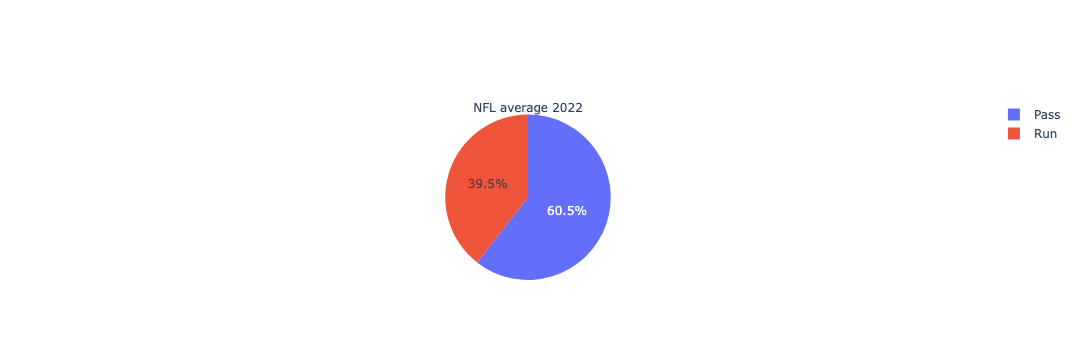

In [205]:
fig = go.Figure(data=[go.Pie(labels=labels, values=values, title='NFL average 2022')])
fig.show()

In [164]:
print('NFL average run:pass ratio = '+str(np.round(no_runs/no_passes,2)))

NFL average run:pass ratio = 0.65


## Per team

In [206]:
df_runs = df_pbp_2022.groupby('posteam')['play_type'].apply(lambda x: (x=='run').sum()).reset_index(name='no of runs')
df_passes = df_pbp_2022.groupby('posteam')['play_type'].apply(lambda x: (x=='pass').sum()).reset_index(name='no of passes')

In [207]:
df_run_pass = df_runs.merge(df_passes, on="posteam")

In [208]:
df_run_pass = df_run_pass.merge(df_teams[["team_abbr", "team_color"]], left_on="posteam", right_on="team_abbr")

In [209]:
# df_ratios = df_pbp_2022.groupby('posteam')['play_type'].apply(lambda x: (x=='run').sum()).reset_index(name='no of runs')
# df_ratios['no of passes'] = df_pbp_2022.groupby('posteam')['play_type'].apply(lambda x: (x=='pass').sum()).values

In [210]:
df_run_pass['run pct'] = df_run_pass['no of runs']/(df_run_pass['no of runs']+df_run_pass['no of passes'])*100
df_run_pass['pass pct'] = df_run_pass['no of passes']/(df_run_pass['no of runs']+df_run_pass['no of passes'])*100
df_run_pass['run-pass ratio'] = df_run_pass['no of runs']/df_run_pass['no of passes']

### Who runs/passes the most?

In [211]:
df_run_pass.sort_values(by=['run-pass ratio'])

,posteam,no of runs,no of passes,team_abbr,team_color,run pct,pass pct,run-pass ratio
24,NYJ,17,62,NYJ,#003F2D,21.518987,78.481013,0.274194
18,LV,13,44,LV,#000000,22.807018,77.192982,0.295455
8,DAL,17,46,DAL,#002244,26.984127,73.015873,0.369565
16,LA,18,48,LA,#003594,27.272727,72.727273,0.375000
14,JAX,18,45,JAX,#006778,28.571429,71.428571,0.400000
11,GB,17,42,GB,#203731,28.813559,71.186441,0.404762
9,DEN,20,44,DEN,#002244,31.250000,68.750000,0.454545
0,ARI,21,43,ARI,#97233F,32.812500,67.187500,0.488372
27,SEA,16,30,SEA,#002244,34.782609,65.217391,0.533333
22,NO,20,37,NO,#D3BC8D,35.087719,64.912281,0.540541


#### Yards per run/pass

In [212]:
df_total_yds = df_pbp_2022.groupby(['play_type','posteam'])['yards_gained'].sum()

In [213]:
df_run_pass = df_run_pass.merge(df_total_yds['run'], on="posteam")
df_run_pass = df_run_pass.merge(df_total_yds['pass'], on="posteam",suffixes=('_run','_pass'))

In [214]:
df_run_pass['yds_per_run'] = df_run_pass['yards_gained_run'].values/df_run_pass['no of runs'].values
df_run_pass['yds_per_pass_attempt'] = df_run_pass['yards_gained_pass'].values/df_run_pass['no of passes'].values

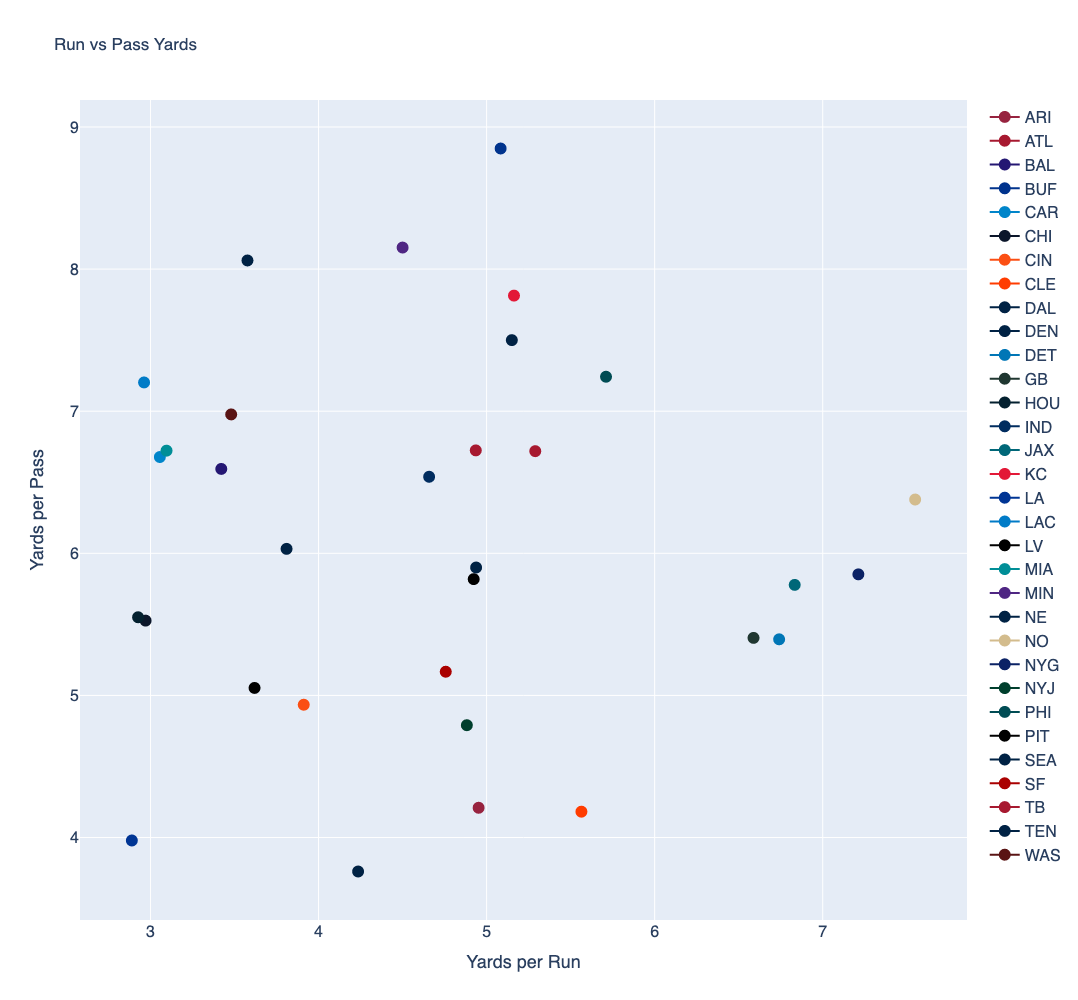

In [216]:
fig = go.Figure()
for i in range(len(df_run_pass)):
    fig.add_trace(
        go.Scatter(
            x=[df_run_pass['yds_per_run'][i]], 
            y=[df_run_pass['yds_per_pass_attempt'][i]], 
            name=df_run_pass['posteam'][i], 
            # mode="markers", 
            marker=dict(size=12,
                        color=df_run_pass['team_color'][i])
            # fill=df_run_pass['team_color'][i],
            # hovertemplate=f"<b>{name}</b><br>%{{y}} yds through week %{{x}}<extra></extra>"
        )
    )
    
fig.update_layout(
    font_family="Averta, sans-serif",
    hoverlabel_font_family="Averta, sans-serif",
    title='Run vs Pass Yards',
    xaxis_title_text="Yards per Run",
    xaxis_title_font_size=18,
    xaxis_tickfont_size=16,
    yaxis_title_text="Yards per Pass",
    yaxis_title_font_size=18,
    yaxis_tickfont_size=16,
    hoverlabel_font_size=16,
    legend_font_size=16,
    height=1000,
    width=1000
)
        
fig.show()

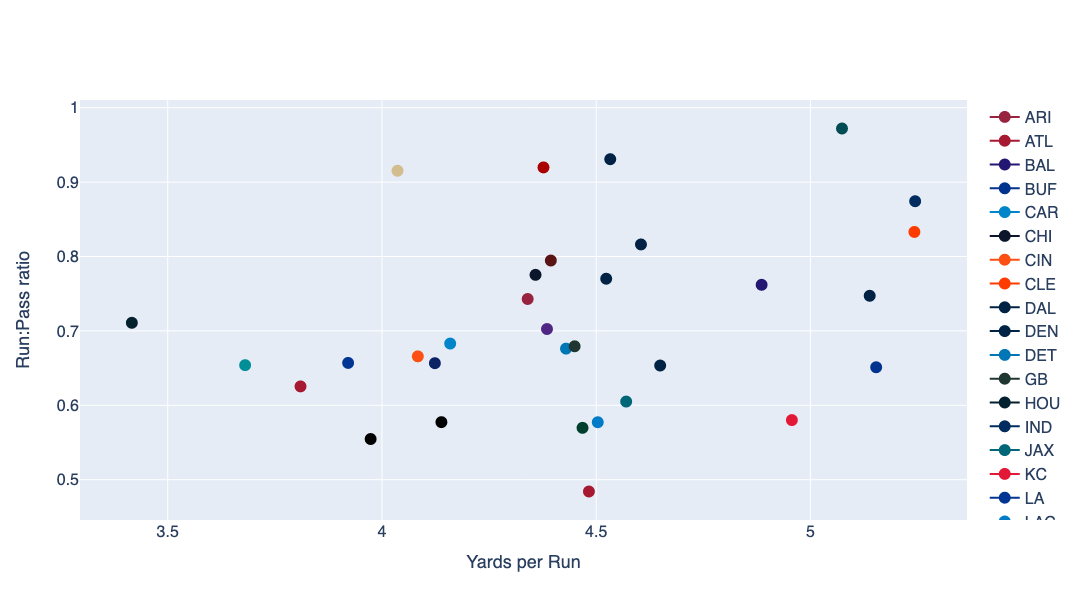

In [180]:
fig = go.Figure()
for i in range(len(df_run_pass)):
    fig.add_trace(
        go.Scatter(
            x=[df_run_pass['yds_per_run'][i]], 
            y=[df_run_pass['run-pass ratio'][i]], 
            name=df_run_pass['posteam'][i], 
            # mode="markers", 
            marker=dict(size=12,
                        color=df_run_pass['team_color'][i])
            # fill=df_run_pass['team_color'][i],
            # hovertemplate=f"<b>{name}</b><br>%{{y}} yds through week %{{x}}<extra></extra>"
        )
    )
    
fig.update_layout(
    font_family="Averta, sans-serif",
    hoverlabel_font_family="Averta, sans-serif",
    xaxis_title_text="Yards per Run",
    xaxis_title_font_size=18,
    xaxis_tickfont_size=16,
    yaxis_title_text="Run:Pass ratio",
    yaxis_title_font_size=18,
    yaxis_tickfont_size=16,
    hoverlabel_font_size=16,
    legend_font_size=16,
    height=600,
    width=1000
)
        
fig.show()

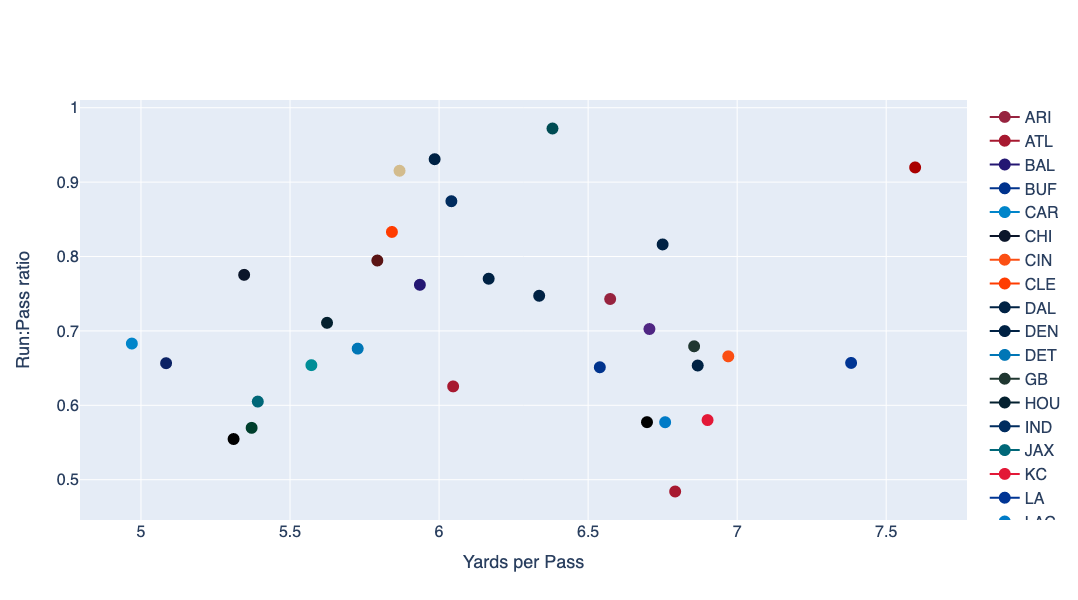

In [181]:
fig = go.Figure()
for i in range(len(df_run_pass)):
    fig.add_trace(
        go.Scatter(
            x=[df_run_pass['yds_per_pass_attempt'][i]], 
            y=[df_run_pass['run-pass ratio'][i]], 
            name=df_run_pass['posteam'][i], 
            # mode="markers", 
            marker=dict(size=12,
                        color=df_run_pass['team_color'][i])
            # fill=df_run_pass['team_color'][i],
            # hovertemplate=f"<b>{name}</b><br>%{{y}} yds through week %{{x}}<extra></extra>"
        )
    )
    
fig.update_layout(
    font_family="Averta, sans-serif",
    hoverlabel_font_family="Averta, sans-serif",
    xaxis_title_text="Yards per Pass",
    xaxis_title_font_size=18,
    xaxis_tickfont_size=16,
    yaxis_title_text="Run:Pass ratio",
    yaxis_title_font_size=18,
    yaxis_tickfont_size=16,
    hoverlabel_font_size=16,
    legend_font_size=16,
    height=600,
    width=1000
)
        
fig.show()

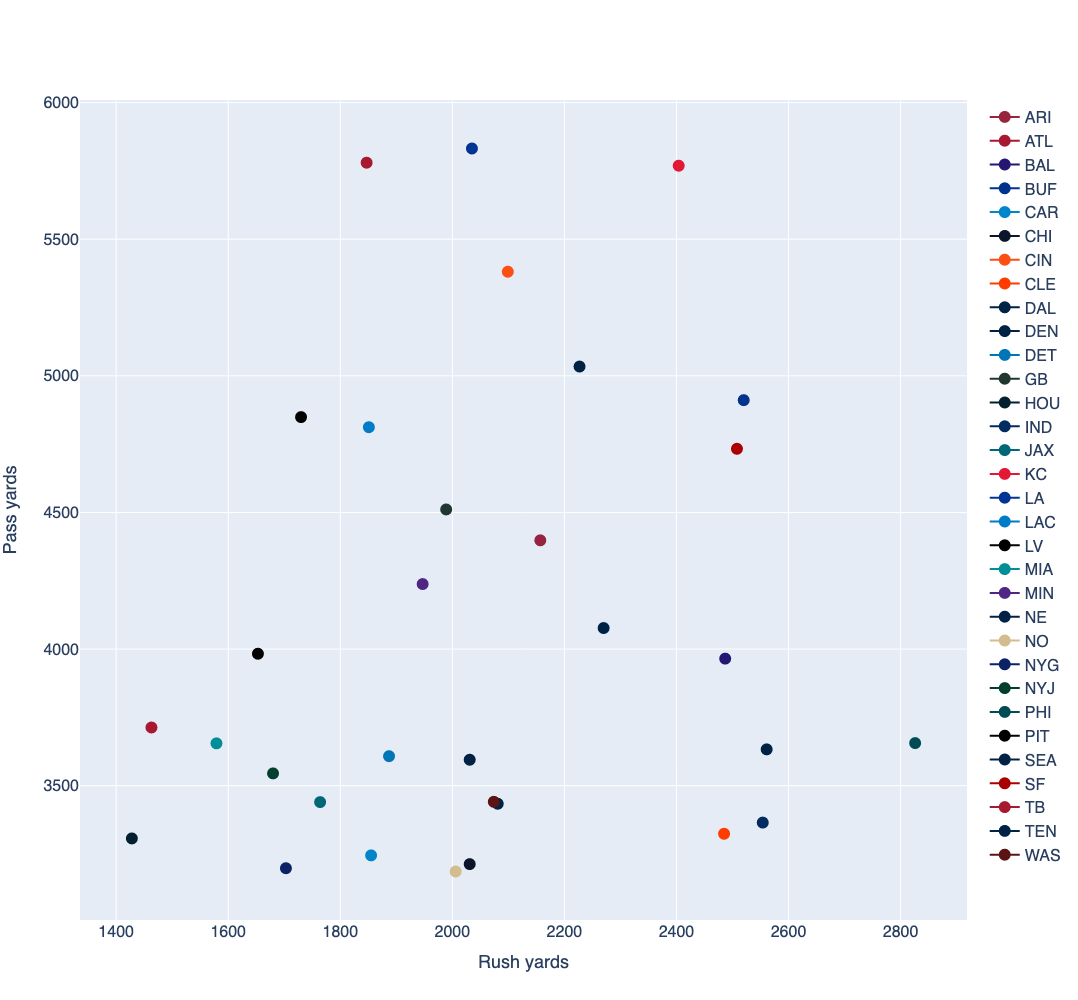

In [182]:
fig = go.Figure()
for i in range(len(df_run_pass)):
    fig.add_trace(
        go.Scatter(
            x=[df_run_pass['yards_gained_run'][i]], 
            y=[df_run_pass['yards_gained_pass'][i]], 
            name=df_run_pass['posteam'][i], 
            # mode="markers", 
            marker=dict(size=12,
                        color=df_run_pass['team_color'][i])
            # fill=df_run_pass['team_color'][i],
            # hovertemplate=f"<b>{name}</b><br>%{{y}} yds through week %{{x}}<extra></extra>"
        )
    )
    
fig.update_layout(
    font_family="Averta, sans-serif",
    hoverlabel_font_family="Averta, sans-serif",
    xaxis_title_text="Rush yards",
    xaxis_title_font_size=18,
    xaxis_tickfont_size=16,
    yaxis_title_text="Pass yards",
    yaxis_title_font_size=18,
    yaxis_tickfont_size=16,
    hoverlabel_font_size=16,
    legend_font_size=16,
    height=1000,
    width=1000
)
        
fig.show()

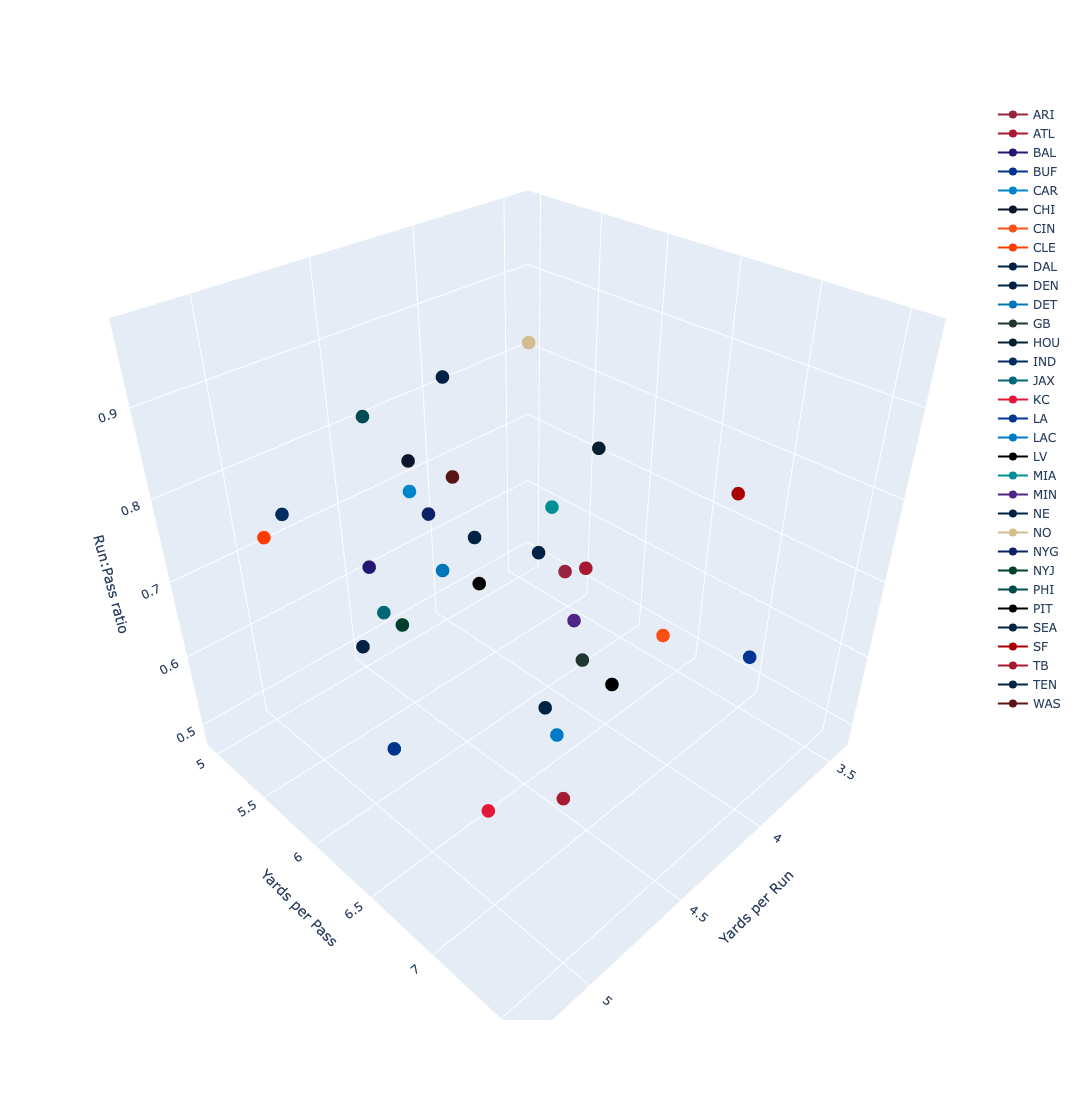

In [183]:
fig = go.Figure()

for i in range(len(df_run_pass)):
    fig.add_trace(
        go.Scatter3d(x=[df_run_pass['yds_per_run'][i]], 
                     y=[df_run_pass['yds_per_pass_attempt'][i]],
                     z=[df_run_pass['run-pass ratio'][i]],
                     name=df_run_pass['posteam'][i], 
                    # mode="markers", 
                    marker=dict(size=8,
                        color=df_run_pass['team_color'][i])))
# fig.update_layout(
#     font_family="Averta, sans-serif",
#     hoverlabel_font_family="Averta, sans-serif",
#     xaxis_title_text="Yards per Run",
#     xaxis_title_font_size=18,
#     xaxis_tickfont_size=16,
#     yaxis_title_text="Yards per Pass",
#     yaxis_title_font_size=18,
#     yaxis_tickfont_size=16,
#     hoverlabel_font_size=16,
#     legend_font_size=16,
#     height=1000,
#     width=1000
# )

fig.update_layout(scene_aspectmode='cube',
                 scene = dict(
                    xaxis_title='Yards per Run',
                    yaxis_title='Yards per Pass',
                    zaxis_title='Run:Pass ratio'),
                 width=1100,
                 height=1100)

# fig.update_layout(
#     scene = dict(
#         xaxis = dict(nticks=4, range=[-100,100],),
#         yaxis = dict(nticks=4, range=[-50,100],),
#         zaxis = dict(nticks=4, range=[-100,100],),),
#     width=700,
#     margin=dict(r=20, l=10, b=10, t=10))

fig.show()

## When up vs. when down

In [ ]:
df_pbp_2022['score_differential']